<a href="https://colab.research.google.com/github/bimarshak7/OpenCV-practice/blob/main/OpenCV_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Opening Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [188]:
!wget https://c4.wallpaperflare.com/wallpaper/925/724/976/look-the-dark-background-kitty-basket-wallpaper-preview.jpg -q -O kitty.jpg

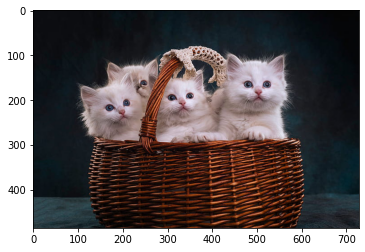

In [189]:
pic = Image.open("./kitty.jpg")

plt.imshow(pic)
plt.show()

In [116]:
pic_arr = np.array(pic)
type(pic),type(pic_arr), pic_arr.shape

(PIL.JpegImagePlugin.JpegImageFile, numpy.ndarray, (486, 728, 3))

In [117]:
def threePic(p1,p2,p3=None,t1="",t2="",t3=""):
  plt.figure(figsize=(20,30))

  plt.subplot(1,3,1)
  plt.imshow(p1,cmap="gray") #red channel
  plt.title(t1)

  plt.subplot(1,3,2)
  plt.imshow(p2,cmap="gray") #red channel
  plt.title(t2)

  if p3 is not None:
    plt.subplot(1,3,3)
    plt.imshow(p3,cmap="gray") #red channel
    plt.title(t3)

  plt.show()

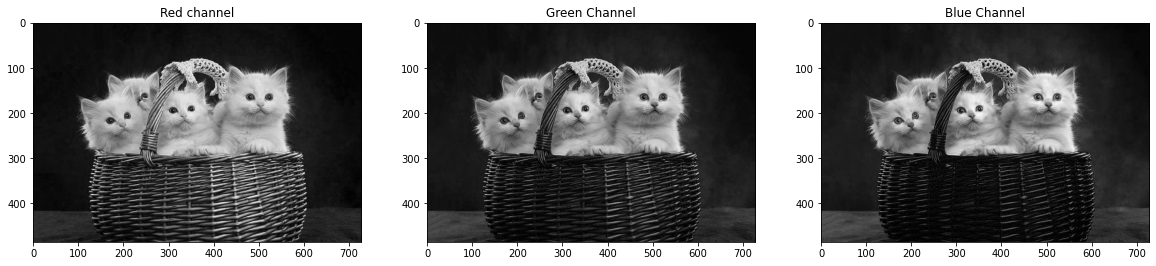

In [118]:
threePic(pic_arr[:,:,0],pic_arr[:,:,1],pic_arr[:,:,2],"Red channel","Green Channel", "Blue Channel")

In [119]:
import cv2

In [120]:
img = cv2.imread("kitty.jpg") #wrong file path returns NoneType instead of error
type(img)

numpy.ndarray

(486, 728, 3)


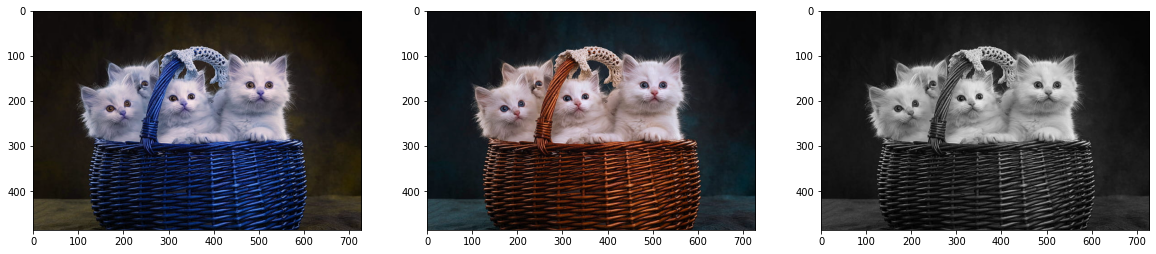

In [121]:
fixed_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.imread("kitty.jpg",cv2.IMREAD_GRAYSCALE)
print(img.shape)

threePic(img, fixed_img, img_gray)

BLuish tint ->because matplotlib imshow expect channels in RGB order but OpenCV uses BGR order

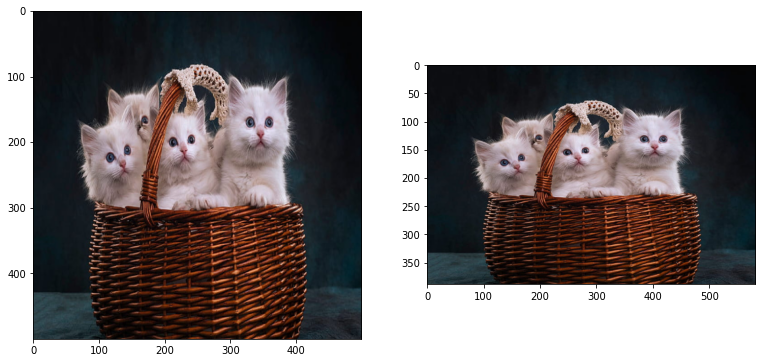

In [122]:
img_resized = cv2.resize(fixed_img,(500,500)) #resize imageto fixed height and width
img_scaled = cv2.resize(fixed_img, None, fx= 0.8, fy= 0.8, interpolation= cv2.INTER_LINEAR) #resizing With a Scaling Factor

threePic(img_resized,img_scaled)

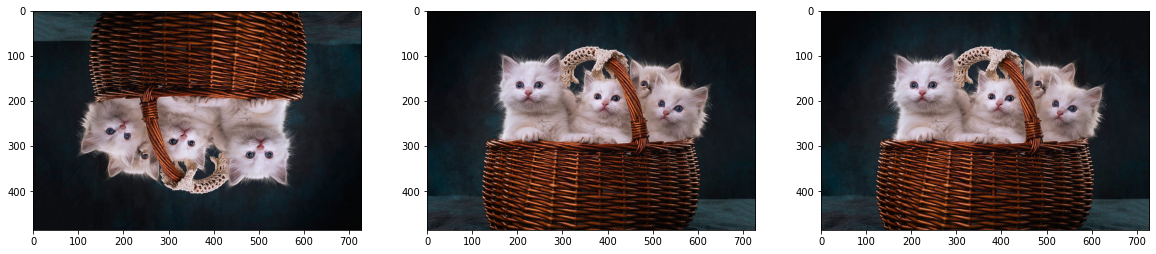

In [123]:
# 0-> about x-axis, 1/+ve-> y-axis, -1/-ve->about both axes
threePic(cv2.flip(fixed_img,0),cv2.flip(fixed_img,1),cv2.flip(fixed_img,2))

### Drawing on Images

In [124]:
blank = np.zeros((512,512,3),dtype=np.int16)
blank.shape

(512, 512, 3)

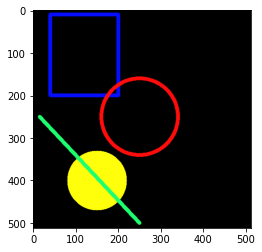

In [125]:
cv2.rectangle(blank,pt1=(40,10),pt2=(200,200),color=(5,14,255),thickness=7)
cv2.circle(blank,center=(250,250),radius=90,color=(300,12,12),thickness=7)
cv2.circle(blank,center=(150,400),radius=70,color=(300,312,12),thickness=-1)
draw = cv2.line(blank,pt1=(15,250),pt2=(250,500),color=(30,312,112),thickness=8)

plt.imshow(draw)

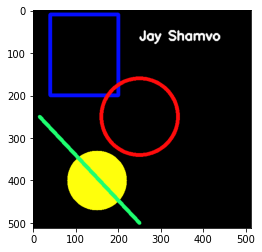

In [126]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(draw,text="Jay Shamvo",org=(250,70),fontFace=font,fontScale=1,color=(250,250,250),thickness=3,lineType=cv2.LINE_AA)
plt.imshow(draw)

## Image Processing
HSL-> hue saturation lightness  
HSV-> Hue Saturation Value

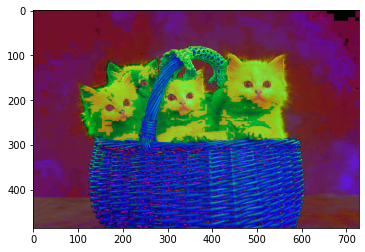

In [143]:
img = cv2.imread("kitty.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
plt.imshow(img)

In [144]:
!wget https://openclipart.org/image/2400px/svg_to_png/172060/Merlin2525-Do-Not-Copy-Business-Stamp-1.png -q -O mark.png

In [145]:
img = cv2.cvtColor(img,cv2.COLOR_HLS2RGB)

pic = cv2.imread("mark.png")
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

img.shape, pic.shape

((486, 728, 3), (2400, 2393, 3))

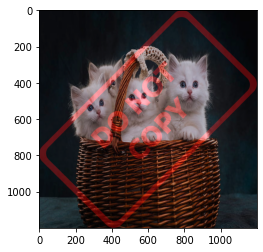

In [146]:
#Blending images of same sizes
pic = cv2.resize(pic,(1200,1200))
img = cv2.resize(img,(1200,1200))

blended = cv2.addWeighted(src1=img,alpha=0.8,src2=pic,beta=0.4,gamma=0.6)
plt.imshow(blended)

In [147]:
#overlay smaller image on top of bigger one (no blending)
#numpy reassignment
img = cv2.imread("kitty.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pic = cv2.imread("mark.png")
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

small_img = cv2.resize(pic,(300,300))

In [148]:
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = x_offset + small_img.shape[0]

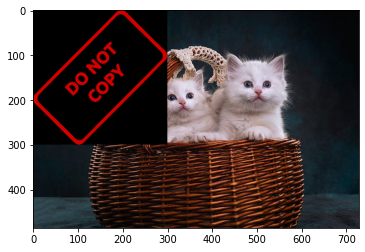

In [149]:
img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(img)

In [176]:
#Blending images of different sizes
img = cv2.imread("kitty.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pic = cv2.imread("mark.png")
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

small_img = cv2.resize(pic,(200,200))
img.shape,small_img.shape

((486, 728, 3), (200, 200, 3))

In [177]:
rows,cols,channels = img.shape

y_offset = rows-200
x_offset = cols-200

In [178]:
rows,cols

(486, 728)

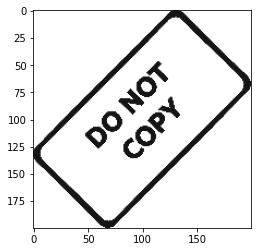

In [179]:
roi = img[y_offset:rows,x_offset:cols]

img_gray = cv2.cvtColor(small_img,cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(img_gray)
plt.imshow(mask_inv,cmap="gray")

In [180]:
white_back = np.full(small_img.shape,255,dtype=np.uint8)
bg = cv2.bitwise_or(white_back,white_back,mask=img_gray) #make 3 channels in grayscale image

In [181]:
roi.shape

(200, 200, 3)

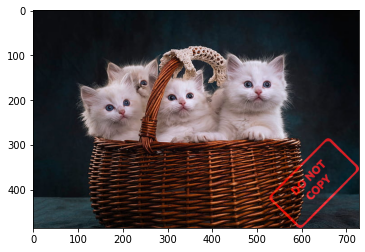

In [182]:
fg = cv2.bitwise_or(small_img,small_img,mask=img_gray)

final_roi = cv2.bitwise_or(roi,fg)

img[y_offset:y_offset+rows,x_offset:x_offset+cols] = final_roi

plt.imshow(img)